# CPN003 - Enrich Petri Net with Performance Information

In [1]:
import pm4py

### Step 1: Import an event log (XES format)

In [2]:
from pm4py.objects.log.importer.xes import importer as xes_importer

log = xes_importer.apply("input_data/running-example.xes")

### Step 2: Discover a process model (using Inductive miner)

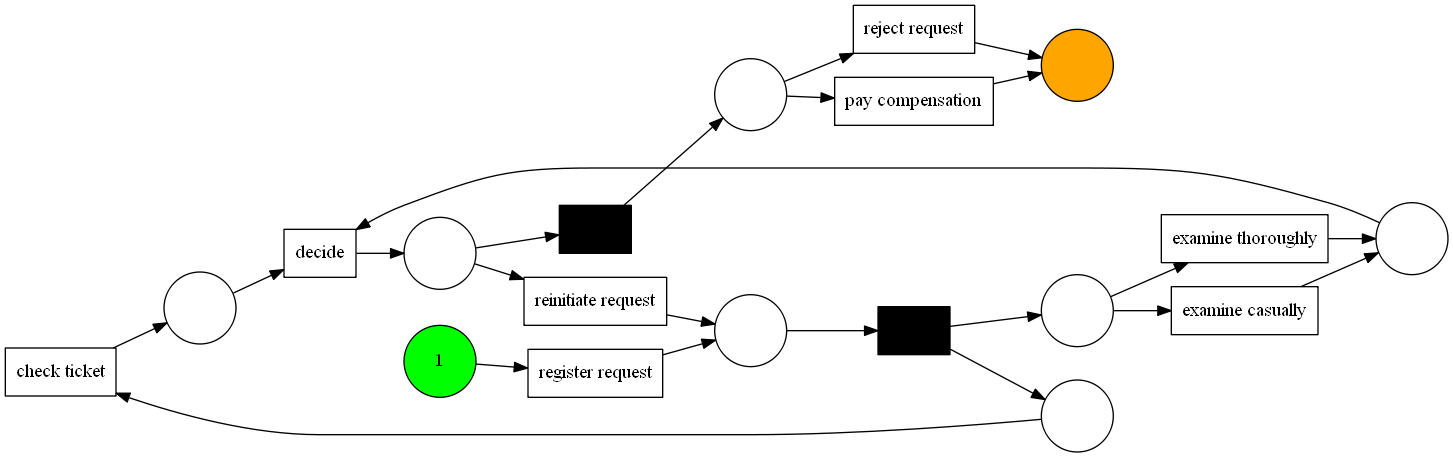

In [9]:
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.visualization.petrinet import visualizer

net, initial_marking, final_marking = inductive_miner.apply(log)
gviz = visualizer.apply(net, initial_marking, final_marking)
visualizer.view(gviz)

### Step 3: Enrich performance information (used existing function in pm4py)

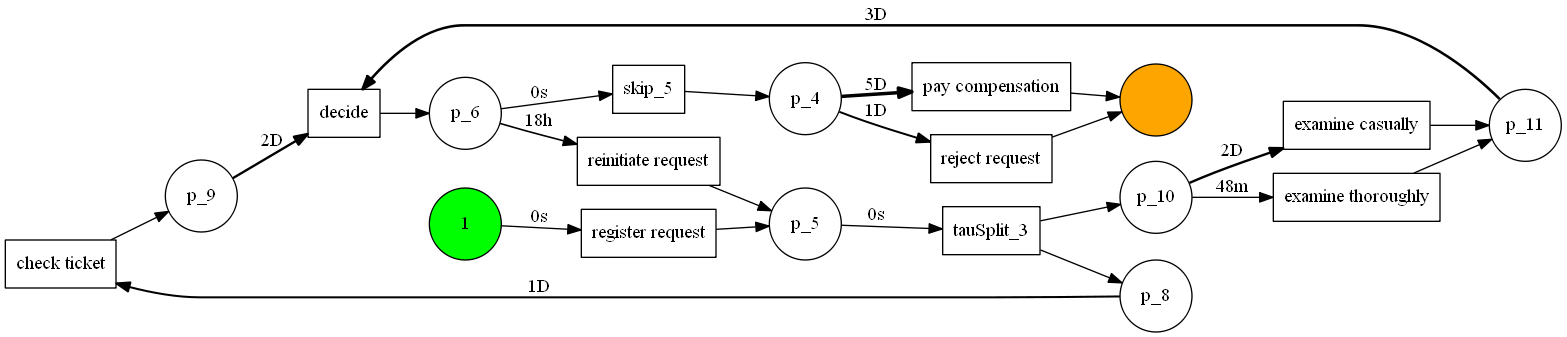

In [10]:
from pm4py.visualization.petrinet import visualizer as pn_visualizer

parameters = {pn_visualizer.Variants.WO_DECORATION.value.Parameters.DEBUG: True, 
              pn_visualizer.Variants.PERFORMANCE.value.Parameters.FORMAT: "png"}
gviz = pn_visualizer.apply(net, initial_marking, final_marking, parameters=parameters, 
                           variant=pn_visualizer.Variants.PERFORMANCE, log=log)
pn_visualizer.save(gviz, "inductive_perf.png")
pn_visualizer.view(gviz)

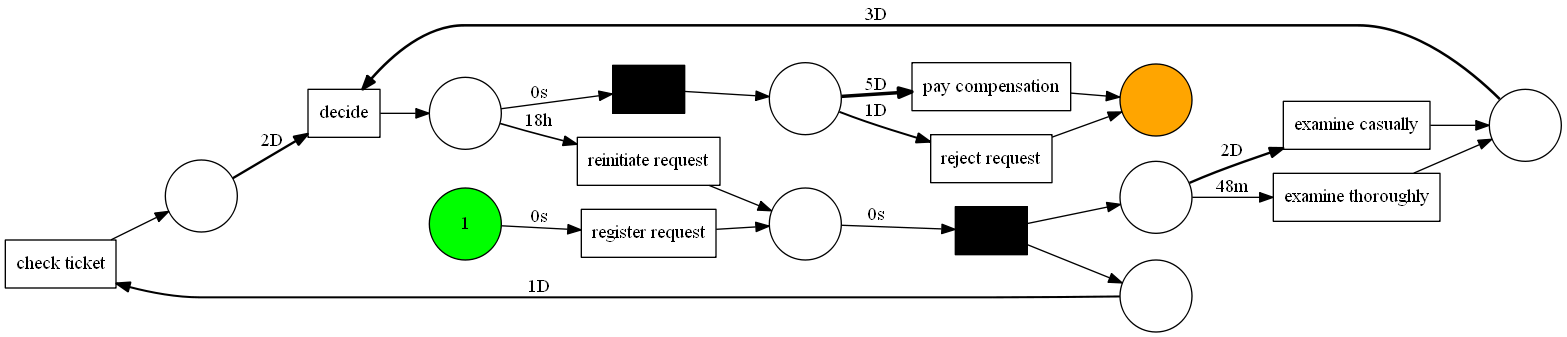

In [5]:
from pm4py.visualization.petrinet import visualizer as pn_visualizer

parameters = {pn_visualizer.Variants.PERFORMANCE.value.Parameters.FORMAT: "png"}
gviz = pn_visualizer.apply(net, initial_marking, final_marking, parameters=parameters, 
                           variant=pn_visualizer.Variants.PERFORMANCE, log=log)
pn_visualizer.save(gviz, "inductive_perf.png")
pn_visualizer.view(gviz)

### Discover a process model (using Heuristic Miner)

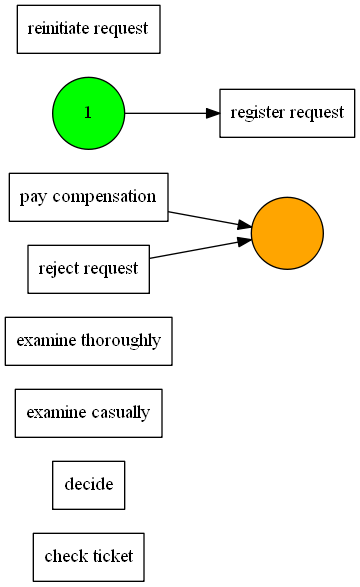

In [6]:
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
from pm4py.visualization.petrinet import visualizer as pn_visualizer

net, im, fm = heuristics_miner.apply(log, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.99})
gviz = pn_visualizer.apply(net, im, fm)
pn_visualizer.view(gviz)

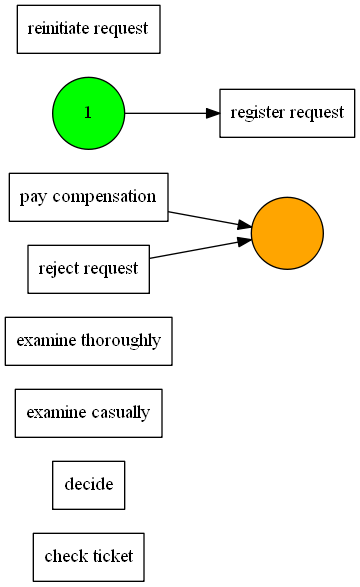

In [7]:
from pm4py.visualization.petrinet import visualizer as pn_visualizer

parameters = {pn_visualizer.Variants.PERFORMANCE.value.Parameters.FORMAT: "png"}
gviz = pn_visualizer.apply(net, im, fm, parameters=parameters, 
                           variant=pn_visualizer.Variants.PERFORMANCE, log=log)
pn_visualizer.save(gviz, "heuristic_perf.png")
pn_visualizer.view(gviz)

### Petri net characteristics

In [11]:
print("Number of places: ", len(net.places))
print("Places are: ", net.places)
print("Number of arcs: ", len(net.arcs))
print("Arcs are: ", net.arcs)
print("Number of transitions: ", len(net._PetriNet__transitions))
print("Transitions are: ", net._PetriNet__transitions)

Number of places:  9
Places are:  {p_11, sink, p_9, p_5, source, p_10, p_6, p_8, p_4}
Number of arcs:  22
Arcs are:  {(p)p_6->(t)reinitiate request, (p)p_8->(t)check ticket, (p)p_11->(t)decide, (p)p_9->(t)decide, (p)p_5->(t)tauSplit_3, (t)check ticket->(p)p_9, (p)p_10->(t)examine casually, (t)reinitiate request->(p)p_5, (p)p_6->(t)skip_5, (t)skip_5->(p)p_4, (p)source->(t)register request, (p)p_10->(t)examine thoroughly, (t)pay compensation->(p)sink, (p)p_4->(t)pay compensation, (t)tauSplit_3->(p)p_10, (t)decide->(p)p_6, (t)reject request->(p)sink, (t)tauSplit_3->(p)p_8, (t)examine casually->(p)p_11, (t)examine thoroughly->(p)p_11, (t)register request->(p)p_5, (p)p_4->(t)reject request}
Number of transitions:  10
Transitions are:  {examine casually, register request, decide, examine thoroughly, reject request, tauSplit_3, reinitiate request, pay compensation, skip_5, check ticket}


In [15]:
# Some event information (not required)
for case_index, case in enumerate(log):
    print(f"\n case index: %d  case id: %s" % (case_index, case.attributes["concept:name"]))
    for event_index, event in enumerate(case):
        print(f"event index: %d  event activity: %s" % (event_index, event["concept:name"]))


 case index: 0  case id: 3
event index: 0  event activity: register request
event index: 1  event activity: examine casually
event index: 2  event activity: check ticket
event index: 3  event activity: decide
event index: 4  event activity: reinitiate request
event index: 5  event activity: examine thoroughly
event index: 6  event activity: check ticket
event index: 7  event activity: decide
event index: 8  event activity: pay compensation

 case index: 1  case id: 2
event index: 0  event activity: register request
event index: 1  event activity: check ticket
event index: 2  event activity: examine casually
event index: 3  event activity: decide
event index: 4  event activity: pay compensation

 case index: 2  case id: 1
event index: 0  event activity: register request
event index: 1  event activity: examine thoroughly
event index: 2  event activity: check ticket
event index: 3  event activity: decide
event index: 4  event activity: reject request

 case index: 3  case id: 6
event ind

In [16]:
# Resource information
for case_index, case in enumerate(log):
    print(f"\n case index: %d  case id: %s" % (case_index, case.attributes["concept:name"]))
    for event_index, event in enumerate(case):
        if "org:resource" not in event:
            print("No resource information available")
            exit()
        resources = [event["org:resource"]]
        print(f"event index: %d  event activity: %s" % (event_index, event["concept:name"]))
        print(f"Resource used for this activity is %s" % resources)


 case index: 0  case id: 3
event index: 0  event activity: register request
Resource used for this activity is ['Pete']
event index: 1  event activity: examine casually
Resource used for this activity is ['Mike']
event index: 2  event activity: check ticket
Resource used for this activity is ['Ellen']
event index: 3  event activity: decide
Resource used for this activity is ['Sara']
event index: 4  event activity: reinitiate request
Resource used for this activity is ['Sara']
event index: 5  event activity: examine thoroughly
Resource used for this activity is ['Sean']
event index: 6  event activity: check ticket
Resource used for this activity is ['Pete']
event index: 7  event activity: decide
Resource used for this activity is ['Sara']
event index: 8  event activity: pay compensation
Resource used for this activity is ['Ellen']

 case index: 1  case id: 2
event index: 0  event activity: register request
Resource used for this activity is ['Mike']
event index: 1  event activity: chec